# Credit Card Fraud Detection Model 

**By DAJAH VINCENT**

In [2]:
#Importing data manipulation and visualization libraries 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sb 
%matplotlib inline

In [3]:
#reading the creditcard dataset

creditCard = pd.read_csv("creditcard.csv")

In [4]:
#viewing the structure of the creditCard datset

creditCard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Exploratory Data Analysis**

In [5]:
#viewing the data first 5 rows from the creditcard dataset

creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#viewing the last 5 rows from the creditcard dataset

creditCard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
creditCard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# I wanted to see the description of the dataset while rounding up the floated fraction to 2 decimals. 
#I also transpose the result to be able to see the entire columns

round(creditCard.describe(), 2).T

#creditCard.round(2)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [9]:
#checking for any NaN or null values in the columns of the dataset

creditCard.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
#checking the number of duplicated values in the datsets 

creditCard.duplicated().sum()

1081

In [11]:
#dropping or deleting the duplicated data values 

creditCard.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
#Checking the class of identified legit and fraudulent transactions

creditCard["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**Creating Visualization**

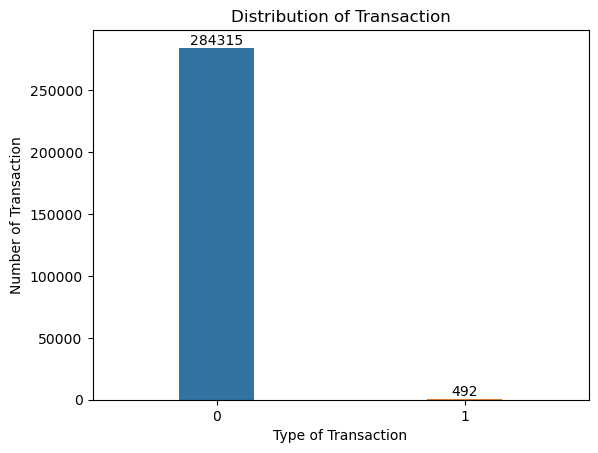

In [13]:
ax = sb.countplot(data = creditCard, x = "Class", width = 0.3)
ax.set_title("Distribution of Transaction")
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Transaction")


for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

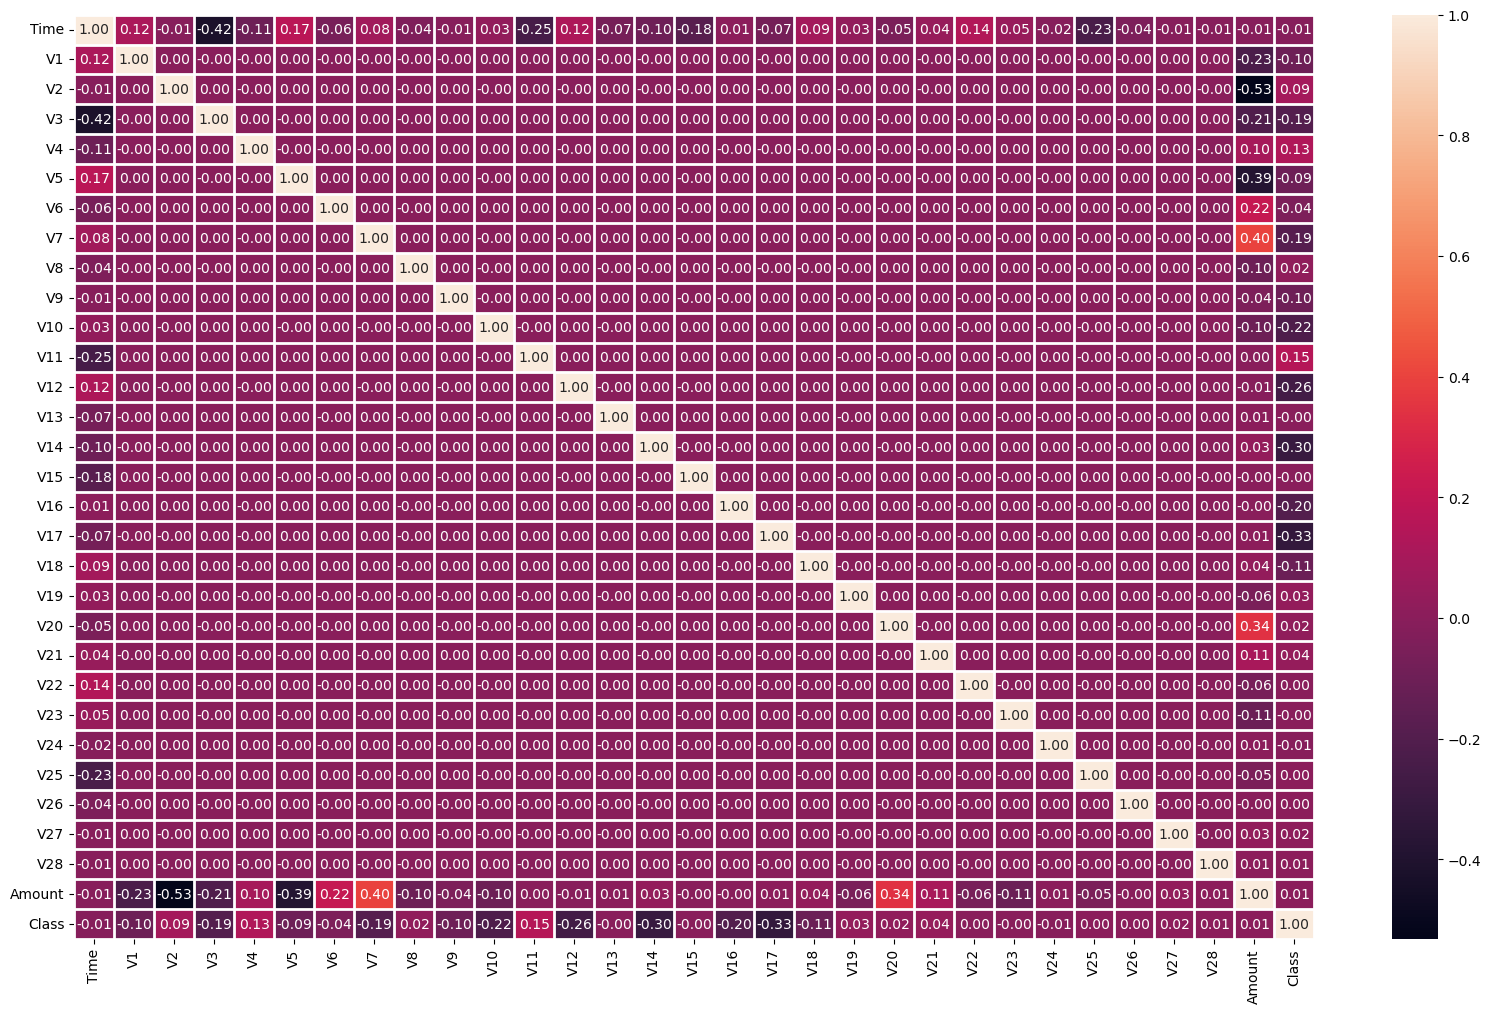

In [14]:

plt.figure(figsize = (20, 12))
ax = sb.heatmap(creditCard.corr(), annot = True, fmt = '.2f')

for i in range(creditCard.shape[1] + 1):
    ax.axvline(i, color='white', lw = 2)
    ax.axhline(i, color='white', lw = 2)
#plt.tight_layout()
plt.show()

**Normalizing the legitimate and fraudeulent data**

In [15]:
#create a function that seperates the class of transaction between fraud and legit transactions

def split_data_by_class(creditCard):
    
    legit = creditCard[creditCard["Class"] == 0]
    fraud = creditCard[creditCard["Class"] == 1]
    return legit, fraud

# Example usage:
legit_df, fraud_df = split_data_by_class(creditCard)


In [16]:
legit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284315 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284315 non-null  float64
 1   V1      284315 non-null  float64
 2   V2      284315 non-null  float64
 3   V3      284315 non-null  float64
 4   V4      284315 non-null  float64
 5   V5      284315 non-null  float64
 6   V6      284315 non-null  float64
 7   V7      284315 non-null  float64
 8   V8      284315 non-null  float64
 9   V9      284315 non-null  float64
 10  V10     284315 non-null  float64
 11  V11     284315 non-null  float64
 12  V12     284315 non-null  float64
 13  V13     284315 non-null  float64
 14  V14     284315 non-null  float64
 15  V15     284315 non-null  float64
 16  V16     284315 non-null  float64
 17  V17     284315 non-null  float64
 18  V18     284315 non-null  float64
 19  V19     284315 non-null  float64
 20  V20     284315 non-null  float64
 21  V21     284315 

In [17]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 22  V2

In [18]:
legit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


In [19]:
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


In [20]:
#sampling the legit transaction to a match a 492 rows

new_legit_df = legit_df.sample(n = 492)


In [21]:
print(new_legit_df)

            Time        V1        V2        V3        V4        V5        V6  \
278637  168331.0  1.924745  0.476715 -0.972502  3.488065  0.895899  0.768858   
191786  129409.0 -0.775259  0.435444  0.797722 -2.198371 -0.492238 -0.918507   
182166  125289.0 -1.169186 -1.106668 -0.302463 -3.042068  2.134270  0.978630   
211541  138458.0 -0.636187 -0.617568  0.771143  0.043623 -0.922183 -0.018679   
195395  131031.0  1.882015  0.456126  0.091758  3.660667  0.211950  0.702324   
...          ...       ...       ...       ...       ...       ...       ...   
273013  165377.0 -3.617360  1.760947 -3.127011 -0.728001 -0.220947  1.096116   
186375  127077.0  2.068718 -1.300177 -1.540357 -2.212075 -0.487425 -0.080340   
14116    25114.0  1.090593 -0.054415  1.214231  1.844288 -0.427767  0.866735   
84091    60158.0 -3.327739  0.519052  0.163019  2.461758  0.225975  1.093835   
243234  151850.0 -2.783175  2.675236 -0.129446 -1.579990  0.163257 -0.491482   

              V7        V8        V9  .

In [22]:
#Combine the fraud and the fraud datasets

combine_df = pd.concat([new_legit_df, fraud_df], axis = 0)

In [23]:
#view the combined fraud and legit datasets 

combine_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278637,168331.0,1.924745,0.476715,-0.972502,3.488065,0.895899,0.768858,0.041019,0.085593,-1.147285,...,0.305405,0.936258,-0.056952,0.219160,0.290690,0.221421,-0.040837,-0.059026,10.59,0
191786,129409.0,-0.775259,0.435444,0.797722,-2.198371,-0.492238,-0.918507,-0.010259,0.308602,-1.103166,...,0.293286,0.808270,-0.176873,0.025685,0.010856,-0.270198,0.241484,0.126104,15.00,0
182166,125289.0,-1.169186,-1.106668,-0.302463,-3.042068,2.134270,0.978630,0.639190,-0.251930,2.129698,...,0.015857,1.219414,-0.846781,-0.798398,0.508283,-0.551486,-0.387281,-0.407557,99.00,0
211541,138458.0,-0.636187,-0.617568,0.771143,0.043623,-0.922183,-0.018679,1.907556,-0.426148,-1.404138,...,-0.529620,-1.596487,1.071424,-0.236820,-0.780467,-1.207436,-0.060758,0.008146,373.90,0
195395,131031.0,1.882015,0.456126,0.091758,3.660667,0.211950,0.702324,-0.360926,0.137440,-0.650546,...,-0.193657,-0.516363,0.450914,0.543983,-0.503771,-0.408203,0.016273,-0.016981,4.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [24]:
#viewing the new combine data

combine_df["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

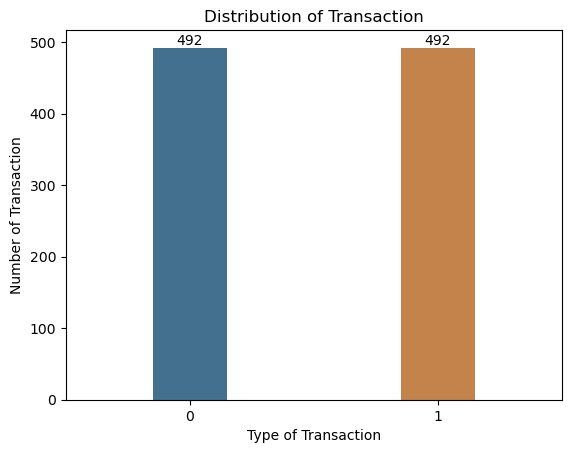

In [26]:
#visualizing the new combine data

ax = sb.countplot(data = combine_df, x = "Class", width = 0.3, saturation = 0.5)
ax.set_title("Distribution of Transaction")
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Transaction")


for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

In [27]:
x = combine_df.drop(columns = "Class", axis = 1)
y = combine_df['Class']

In [28]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
278637,168331.0,1.924745,0.476715,-0.972502,3.488065,0.895899,0.768858,0.041019,0.085593,-1.147285,...,-0.198856,0.305405,0.936258,-0.056952,0.219160,0.290690,0.221421,-0.040837,-0.059026,10.59
191786,129409.0,-0.775259,0.435444,0.797722,-2.198371,-0.492238,-0.918507,-0.010259,0.308602,-1.103166,...,0.090186,0.293286,0.808270,-0.176873,0.025685,0.010856,-0.270198,0.241484,0.126104,15.00
182166,125289.0,-1.169186,-1.106668,-0.302463,-3.042068,2.134270,0.978630,0.639190,-0.251930,2.129698,...,-0.552342,0.015857,1.219414,-0.846781,-0.798398,0.508283,-0.551486,-0.387281,-0.407557,99.00
211541,138458.0,-0.636187,-0.617568,0.771143,0.043623,-0.922183,-0.018679,1.907556,-0.426148,-1.404138,...,0.324785,-0.529620,-1.596487,1.071424,-0.236820,-0.780467,-1.207436,-0.060758,0.008146,373.90
195395,131031.0,1.882015,0.456126,0.091758,3.660667,0.211950,0.702324,-0.360926,0.137440,-0.650546,...,-0.173118,-0.193657,-0.516363,0.450914,0.543983,-0.503771,-0.408203,0.016273,-0.016981,4.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [29]:
y

278637    0
191786    0
182166    0
211541    0
195395    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [30]:
# importing the model building libraries 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

**Splitting and training the datasets**

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)


In [32]:
print(x_train)

            Time        V1        V2        V3        V4        V5        V6  \
186381  127079.0  1.587861 -0.491081 -2.445199  1.104056  0.893652 -0.360610   
146352   87623.0  1.671087 -1.590974 -0.238973 -1.425989 -1.555426 -0.270383   
64449    51150.0  0.660132 -0.653132  0.271021  1.132269  0.153691  1.776040   
42007    40918.0 -3.140260  3.367342 -2.778931  3.859701 -1.159518 -0.721552   
230476  146344.0 -0.099724  2.795414 -6.423856  3.247513 -1.632290 -2.766665   
...          ...       ...       ...       ...       ...       ...       ...   
163922  116323.0  1.996808  0.202794 -1.777271  1.035389  0.713585 -0.622029   
263759  161101.0  1.982028  0.140222 -1.794302  1.073558  0.608813 -0.823077   
88897    62341.0 -5.267760  2.506719 -5.290925  4.886134 -3.343188 -1.100085   
95795    65470.0 -0.505965  0.922689  1.633677 -0.146791  0.019813 -0.232812   
191544  129308.0  0.054682  1.856500 -4.075451  4.100098 -0.800931 -0.292502   

              V7        V8        V9  .

In [33]:
print(x_train.shape, x_test.shape)

(738, 30) (246, 30)


In [34]:
model = LogisticRegression()

In [35]:
model.fit(x_train, y_train)

C:\Users\DajahV01\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model evaluation**

In [36]:
#Testing the accuracy of the training data 

x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)
print(f"The model's training data accuracy is: {round(training_data_accuracy * 100, 2)}%")


The model's training data accuracy is: 93.5%


In [37]:
#Testing the accuracy of the testing data 

x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)
print(f"The model's testing data accuracy is: {round(test_data_accuracy * 100, 2)}%")

The model's testing data accuracy is: 95.12%


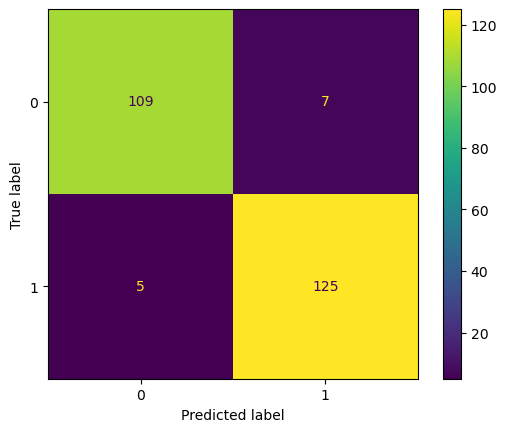

In [38]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report, ConfusionMatrixDisplay
ax = ConfusionMatrixDisplay.from_predictions(y_test, x_test_predict)

plt.show()